<a href="https://colab.research.google.com/github/rutapsz/timo/blob/main/timo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Реализовать функцию скользящего окна для заданного одномерного ряда
данных, формирующую из него матрицу по следующему правилу (рисунок 1).

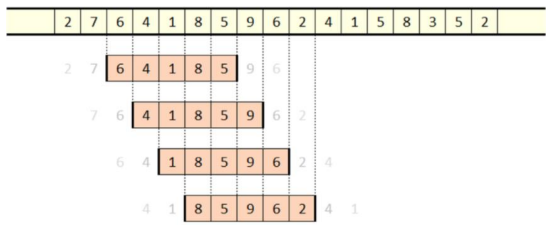

Рисунок 1 - Правило

In [1]:
import numpy as np

def sliding_window(arr, w, step=1):
    if arr.size == 0 or w <= 0:
        return np.array([])

    n = len(arr)
    result = []

    for i in range(0, n - w + 1, step):
        result.append(arr[i:i + w])

    return np.array(result)


window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s), A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s), A2))


True
True


# Задание 2
В задании предлагается ответить на несколько вопросов по данным
репозитория UCI Adult (ссылка https://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.data) и ответить на вопросы:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names = ["age", "workclass", "fnlwgt", "education",
         "education-num", "marital-status", "occupation", "relationship",
         "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

data = pd.read_csv(url, names=names)
print(data.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

1. сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [10]:
sex_counts = data['sex'].value_counts()

print(sex_counts)

sex
 Male      21790
 Female    10771
Name: count, dtype: int64


2. каков средний возраст (признак age) женщин?

In [4]:
female_data = data[data['sex'] == ' Female']
average_age_female = female_data['age'].mean()
print(f'Средний возраст женщин: {average_age_female}')

Средний возраст женщин: 36.85823043357163


3. Какова доля граждан Германии (признак native-country)?

In [20]:
germany_data = data[data['native-country'] == ' Germany']

total_count = data.shape[0]
germany_count = germany_data.shape[0]
germany_proportion = germany_count / total_count

print(f'Доля граждан Германии: {germany_proportion:.2%}')

Доля граждан Германии: 0.42%


4. Постройте гистограмму распределения (bar plot) образования людей (признак education).

<ipython-input-6-620003761bc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')


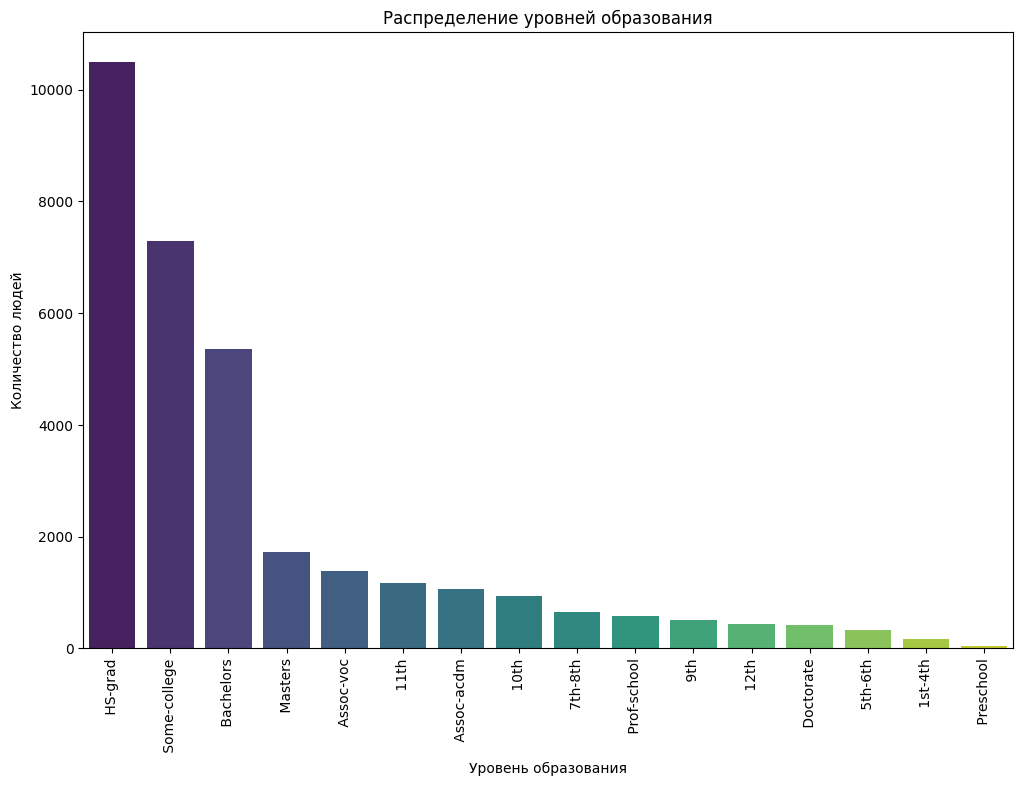

In [6]:
education_counts = data['education'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Распределение уровней образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.xticks(rotation=90)
plt.show()

5. каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [7]:
low_income_data = data[data['salary'] == ' <=50K']
mean_age = low_income_data['age'].mean()
std_age = low_income_data['age'].std()

print(f'Средний возраст людей с доходом менее 50K в год: {mean_age}')
print(f'Среднеквадратичное отклонение возраста людей с доходом менее 50K в год: {std_age}')

Средний возраст людей с доходом менее 50K в год: 36.78373786407767
Среднеквадратичное отклонение возраста людей с доходом менее 50K в год: 14.02008849082488


6. правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование?

In [12]:
high_income_data = data[data['salary'] == ' >50K']

higher_education_levels = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']

has_higher_education = high_income_data['education'].isin(higher_education_levels)

if has_higher_education.all():
    print("Все люди, которые получают больше 50K, имеют как минимум высшее образование.")
else:
    print("Не все люди, которые получают больше 50K, имеют как минимум высшее образование.")

Не все люди, которые получают больше 50K, имеют как минимум высшее образование.


7. выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Каков максимальный возраст мужчин расы Amer-Indian-Eskimo?

In [ ]:
age_stats = data.groupby(['race', 'sex'])['age'].describe()
print(age_stats)

max_age_amer_indian_esquimo_male = data[(data['race'] == ' Amer-Indian-Eskimo') & (data['sex'] == ' Male')]['age'].max()
print(f'Максимальный возраст мужчин расы Amer-Indian-Eskimo: {max_age_amer_indian_esquimo_male}')

                               count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   ma

8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми

In [13]:
male_data = data[data['sex'] == ' Male']

married_statuses = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
married_males = male_data[male_data['marital-status'].isin(married_statuses)]
single_males = male_data[~male_data['marital-status'].isin(married_statuses)]

high_income_married_males = married_males[married_males['salary'] == ' >50K']
fraction_high_income_married = len(high_income_married_males) / len(married_males)

high_income_single_males = single_males[single_males['salary'] == ' >50K']
fraction_high_income_single = len(high_income_single_males) / len(single_males)

print(f'Доля зарабатывающих много среди женатых мужчин: {fraction_high_income_married:.2%}')
print(f'Доля зарабатывающих много среди холостых мужчин: {fraction_high_income_single:.2%}')

if fraction_high_income_married > fraction_high_income_single:
    print("Больше доля зарабатывающих много среди женатых мужчин.")
else:
    print("Больше доля зарабатывающих много среди холостых мужчин.")

income_data = pd.DataFrame({
    'Marital Status': ['Married', 'Single'],
    'Fraction High Income': [fraction_high_income_married, fraction_high_income_single]
})

Доля зарабатывающих много среди женатых мужчин: 44.05%
Доля зарабатывающих много среди холостых мужчин: 8.45%
Больше доля зарабатывающих много среди женатых мужчин.


9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [ ]:
max_hours_per_week = data['hours-per-week'].max()

max_hours_people = data[data['hours-per-week'] == max_hours_per_week]

num_max_hours_people = len(max_hours_people)

high_income_max_hours_people = max_hours_people[max_hours_people['salary'] == ' >50K']
num_high_income_max_hours_people = len(high_income_max_hours_people)

percentage_high_income_max_hours = (num_high_income_max_hours_people / num_max_hours_people) * 100

print(f'Максимальное число часов, которое человек работает в неделю: {max_hours_per_week}')
print(f'Количество людей, работающих {max_hours_per_week} часов в неделю: {num_max_hours_people}')
print(f'Процент зарабатывающих много среди людей, работающих {max_hours_per_week} часов в неделю: {percentage_high_income_max_hours:.2f}%')

Максимальное число часов, которое человек работает в неделю: 99
Количество людей, работающих 99 часов в неделю: 85
Процент зарабатывающих много среди людей, работающих 99 часов в неделю: 29.41%


10. Посчитайте среднее время работы (hours-per-week) зарабатывающих
мало и много (salary) для каждой страны (native-country).

In [15]:
low_income_data = data[data['salary'] == ' <=50K']
high_income_data = data[data['salary'] == ' >50K']

low_income_avg_hours = low_income_data.groupby('native-country')['hours-per-week'].mean()

high_income_avg_hours = high_income_data.groupby('native-country')['hours-per-week'].mean()

print("Среднее время работы зарабатывающих мало (<=50K) по каждой стране:")
print(low_income_avg_hours)

print("\nСреднее время работы зарабатывающих много (>50K) по каждой стране:")
print(high_income_avg_hours)

Среднее время работы зарабатывающих мало (<=50K) по каждой стране:
native-country
 ?                             40.164760
 Cambodia                      41.416667
 Canada                        37.914634
 China                         37.381818
 Columbia                      38.684211
 Cuba                          37.985714
 Dominican-Republic            42.338235
 Ecuador                       38.041667
 El-Salvador                   36.030928
 England                       40.483333
 France                        41.058824
 Germany                       39.139785
 Greece                        41.809524
 Guatemala                     39.360656
 Haiti                         36.325000
 Holand-Netherlands            40.000000
 Honduras                      34.333333
 Hong                          39.142857
 Hungary                       31.300000
 India                         38.233333
 Iran                          41.440000
 Ireland                       40.947368
 Italy          

4 визуализации

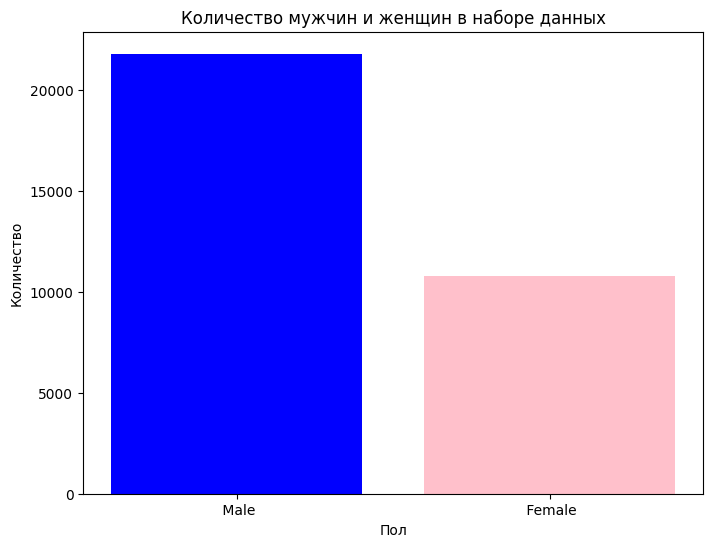

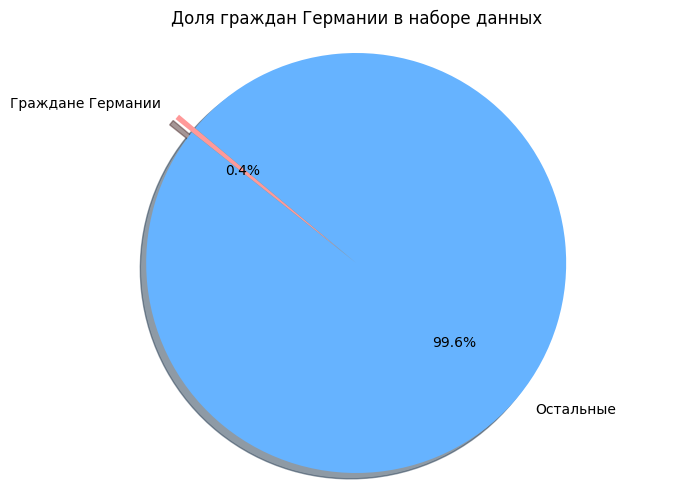

<ipython-input-21-c89c487a05c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital Status', y='Fraction High Income', data=income_data, palette='viridis')


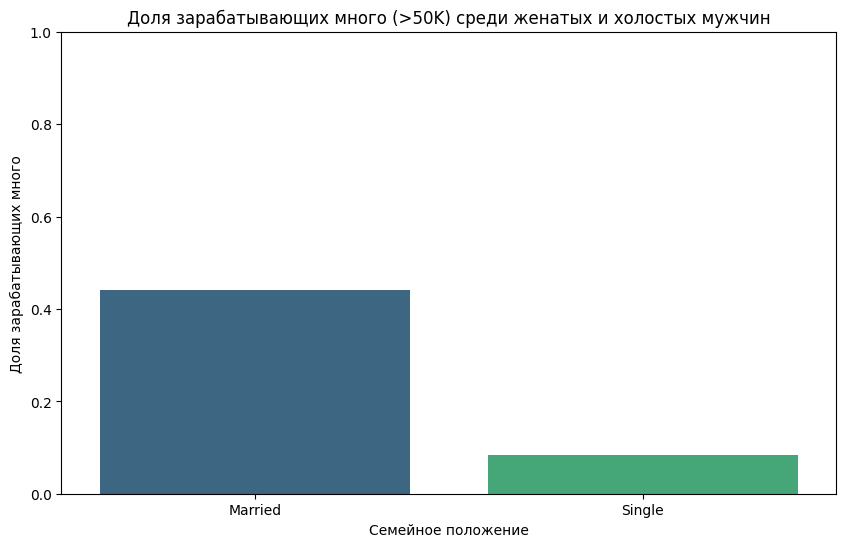

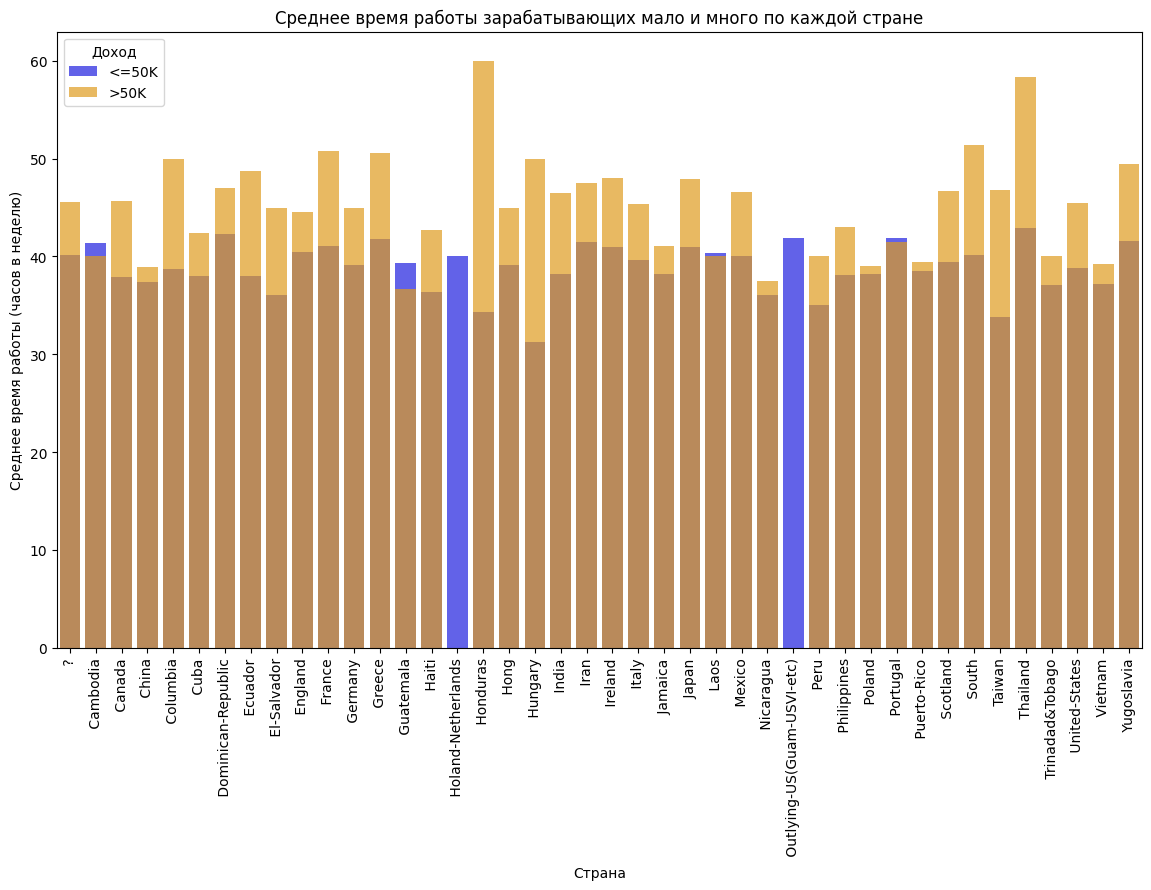

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.title('Количество мужчин и женщин в наборе данных')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

labels = ['Граждане Германии', 'Остальные']
sizes = [germany_count, total_count - germany_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Доля граждан Германии в наборе данных')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Fraction High Income', data=income_data, palette='viridis')
plt.title('Доля зарабатывающих много (>50K) среди женатых и холостых мужчин')
plt.xlabel('Семейное положение')
plt.ylabel('Доля зарабатывающих много')
plt.ylim(0, 1)
plt.show()

avg_hours_data = pd.DataFrame({
    'native-country': low_income_avg_hours.index.union(high_income_avg_hours.index)
})

avg_hours_data = avg_hours_data.set_index('native-country').join(low_income_avg_hours.rename('low_income_avg_hours'))
avg_hours_data = avg_hours_data.join(high_income_avg_hours.rename('high_income_avg_hours'))
avg_hours_data = avg_hours_data.fillna(0)

plt.figure(figsize=(14, 8))
sns.barplot(x=avg_hours_data.index, y='low_income_avg_hours', data=avg_hours_data, color='blue', alpha=0.7, label='<=50K')
sns.barplot(x=avg_hours_data.index, y='high_income_avg_hours', data=avg_hours_data, color='orange', alpha=0.7, label='>50K')
plt.title('Среднее время работы зарабатывающих мало и много по каждой стране')
plt.xlabel('Страна')
plt.ylabel('Среднее время работы (часов в неделю)')
plt.xticks(rotation=90)
plt.legend(title='Доход')
plt.show()

# Задание 3
На основе выбранного вами датасета провести его анализ по минимум 10 признакам.

In [23]:
from google.colab import files
files.upload()


Saving test.csv to test.csv


{'test.csv': b'id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi\r\n1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0\r\n2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0\r\n3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1\r\n4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0\r\n5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1\r\n6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1\r\n7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0\r\n8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1\r\n9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0\r\n10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1\r\n11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0\r\n12,1343,0,2.9,0,2,1,34,0.8,171,3,6,235,1671,3911,15,8,8,1,1,1\r\n13,900,1,1.4,1,0,0,30,1,87,2,3,829,1893,439,6,2,2

In [24]:
df = pd.read_csv('test.csv')
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [25]:
column_names = df.columns

print(column_names)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Выборка 10 признаков для анализа:

*   battery_power: Мощность батареи.
*   clock_speed: Частота процессора.
*   dual_sim: Наличие двух SIM-карт.
*   four_g: Поддержка 4G.
*   int_memory: Внутренняя память.
*   mobile_wt: Вес телефона.
*   n_cores: Количество ядер процессора.
*   px_height: Высота экрана.
*   px_width: Ширина экрана.
*   ram: Объем оперативной памяти.

Анализ:

*   Статистический анализ
*   Корреляционная матрица
*   Гистограммы для признаков
*   Диаграмма рассеяния для двух параметров RAM и px_height



Проверка на пропуски:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Статистическое описание данных:
                 id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   

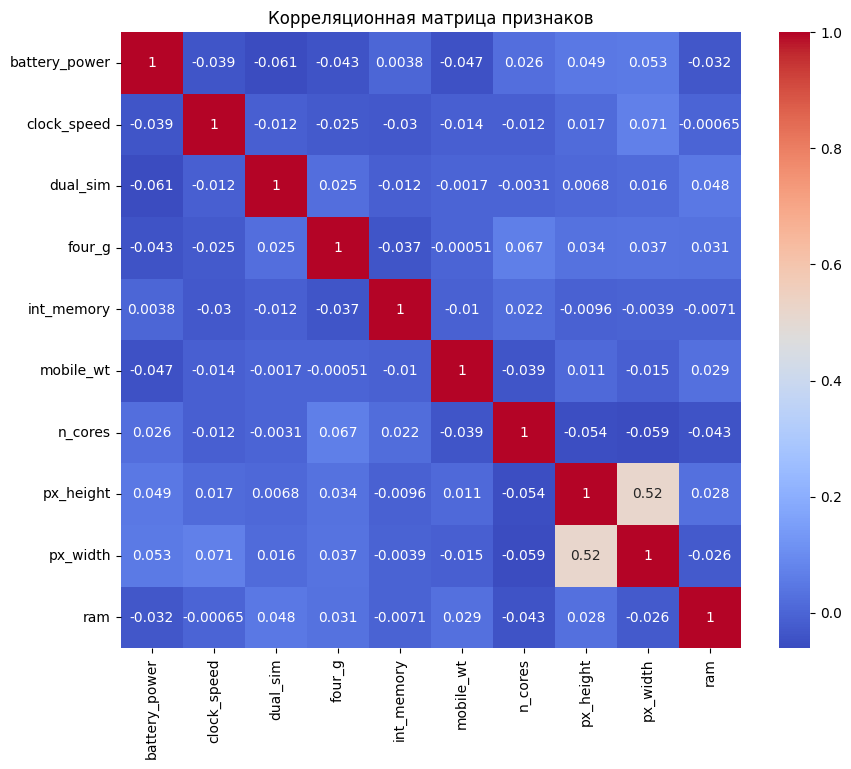

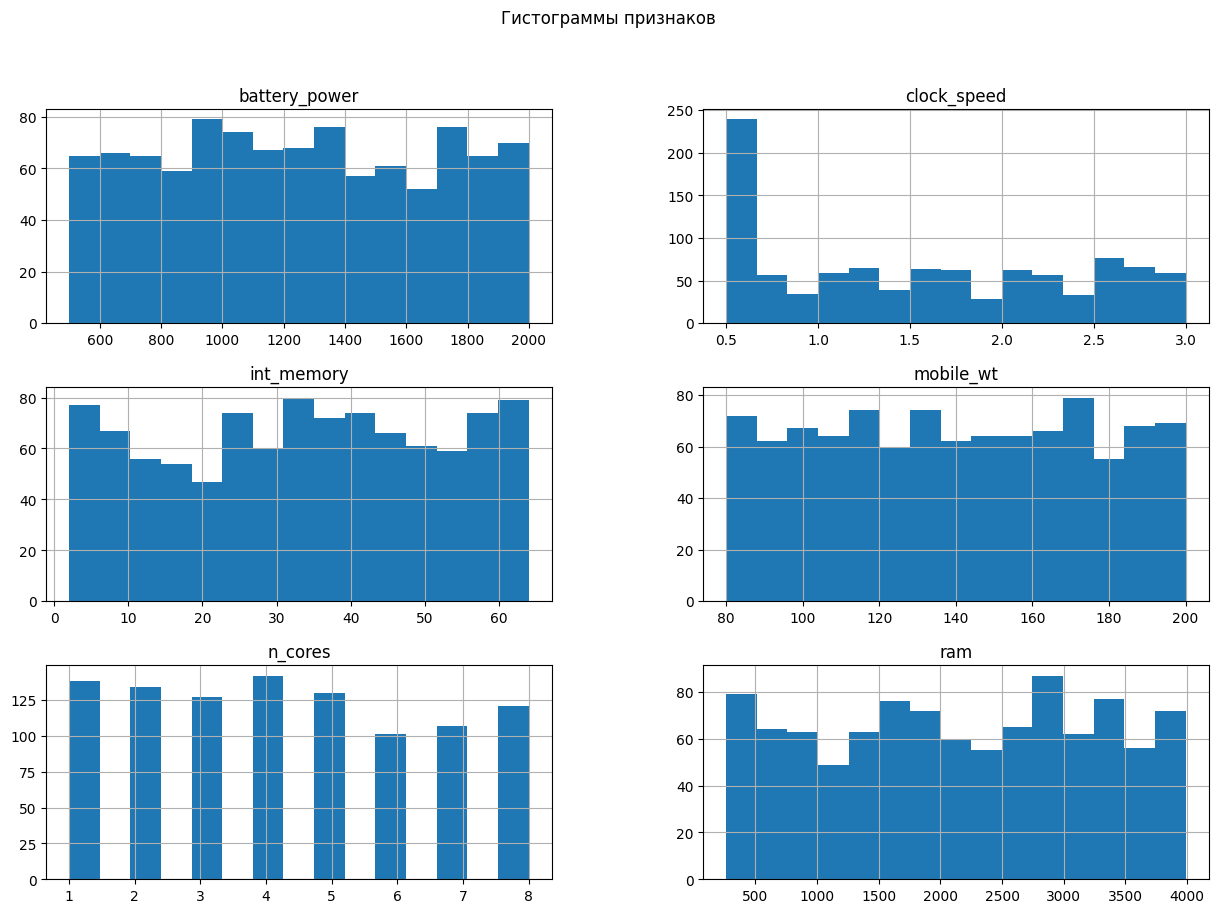

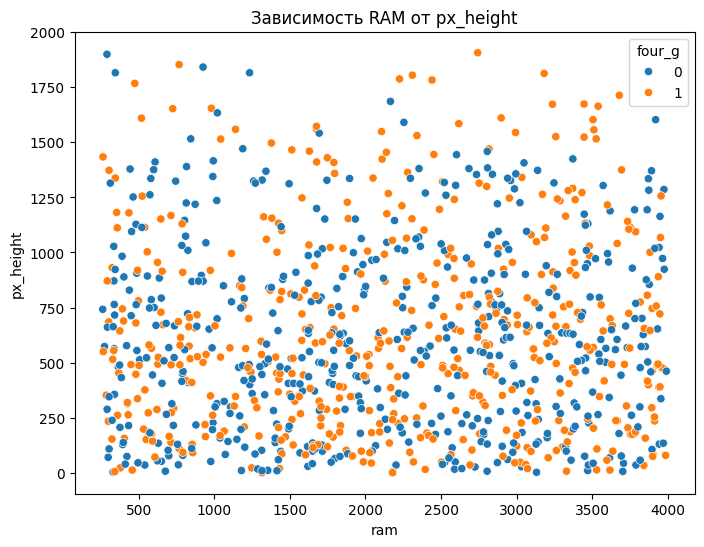

In [26]:
print("Проверка на пропуски:\n", df.isnull().sum())

print("\nСтатистическое описание данных:\n", df.describe())

correlation_matrix = df[['battery_power', 'clock_speed', 'dual_sim', 'four_g', 'int_memory',
                         'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram']].corr()

print("\nКорреляционная матрица:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица признаков")
plt.show()

df[['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 'n_cores', 'ram']].hist(bins=15, figsize=(15, 10))
plt.suptitle("Гистограммы признаков")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ram', y='px_height', data=df, hue='four_g')
plt.title("Зависимость RAM от px_height")
plt.show()